In [1]:
%pip install ultralytics --quiet
import ultralytics
ultralytics.checks()

!nvidia-smi

!ls

Ultralytics YOLOv8.2.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)
Thu May  9 17:28:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              25W / 250W |      2MiB / 16384MiB |      0%      Default |
|  

In [2]:
import warnings

# Suprimir mensagens de advertência
warnings.filterwarnings("ignore")

!pip install ultralytics==8.0.196 --quiet
!pip install roboflow --quiet

# Restaurar mensagens de advertência padrão
warnings.filterwarnings("default")

from roboflow import Roboflow

# Suprimir mensagens de advertência
warnings.filterwarnings("ignore")

from roboflow import Roboflow
rf = Roboflow(api_key="1uaBIxC6yfhPjoHi8YF3")
project = rf.workspace("college-tbzln").project("flytbase-dooap")
version = project.version(2)
dataset = version.download("yolov8")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is i


Extracting Dataset Version Zip to Flytbase-2 in yolov8:: 100%|██████████| 1862/1862 [00:00<00:00, 6167.15it/s]


In [3]:
import yaml

# Caminho para o arquivo data.yaml
yaml_file_path = "/kaggle/working/Flytbase-2/data.yaml"

# Carregar o arquivo YAML
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

# Imprimir o conteúdo
print(data)


{'names': ['human'], 'nc': 1, 'roboflow': {'license': 'MIT', 'project': 'flytbase-dooap', 'url': 'https://universe.roboflow.com/college-tbzln/flytbase-dooap/dataset/2', 'version': 2, 'workspace': 'college-tbzln'}, 'test': '../test/images', 'train': 'Flytbase-2/train/images', 'val': 'Flytbase-2/valid/images'}


In [4]:
import os
import yaml

# Define the directory where the 'images' folders are located
working_directory = "/kaggle/working"

# Define the directory containing the YAML files
yaml_directory = "/kaggle/working/Flytbase-2"

# Define the paths to the image folders
test_path = "/kaggle/working/Flytbase-2/test"
train_path = "/kaggle/working/Flytbase-2/train"
val_path = "/kaggle/working/Flytbase-2/valid"

# Define the path to the YAML file
yaml_file_path = os.path.join(yaml_directory, "data.yaml")

# Update the YAML file with the new image folder paths and class information
data = {
    'test': test_path,
    'train': train_path,
    'val': val_path,
    'nc': 1,  # Number of classes
    'names': ['humans']  # Class names
}

with open(yaml_file_path, 'w') as file:
    yaml.dump(data, file)

print("Image folder paths and class information successfully updated in the YAML file.")


Image folder paths and class information successfully updated in the YAML file.


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 314MB/s]
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Flytbase-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=

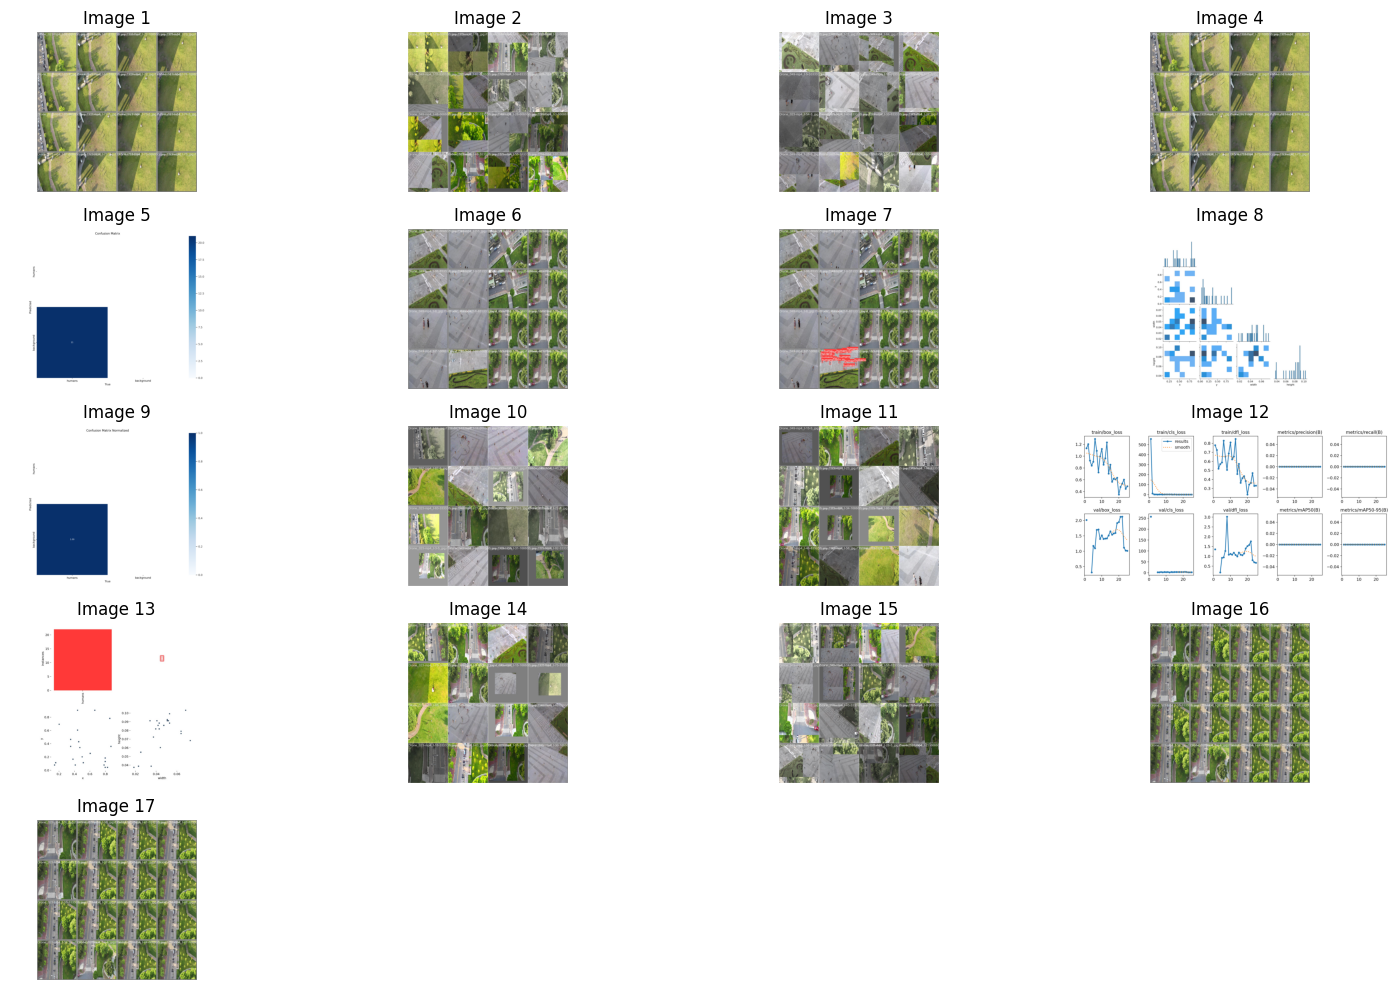

In [23]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Diretório das imagens
images_dir = "/kaggle/working/runs/detect/train"

# Lista todos os arquivos no diretório
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Plot das imagens
num_images = len(image_files)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(15, 10))

for i, image_file in enumerate(image_files, 1):
    image_path = os.path.join(images_dir, image_file)
    try:
        image = Image.open(image_path)
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Image {i}")
    except (OSError, IOError) as e:
        print(f"Erro ao abrir a imagem {image_file}: {e}")

plt.tight_layout()
plt.show()
